In [202]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

# Get the dataset

In [203]:
df=pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [204]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analyse dataset to find overview of features and labels

In [205]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [206]:
df.shape

(891, 12)

In [207]:
cat_data=df.dtypes[df.dtypes=='object'].index
cat_data

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

# Drop features which are having no impact on label

In [208]:
drpcol=['PassengerId','Name','Ticket']

In [209]:
df2=df.drop(drpcol,axis=1)

In [210]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# Fill nan value with mean to avoid droping of entire row asthe other data of rows can be significant 

In [211]:
#df2['Cabin'].fillna(0,inplace=True)
df2['Age'].fillna(df2['Age'].mean(),inplace=True)
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


Below i am creating a new feature from Cabin which will have first char from cabin data example for C85 we will take out "C"

In [212]:
lstcb=list()
for index,row in df2.iterrows():
     lstcb.append(str(row['Cabin'])[0])
df2['New_Cabin']=lstcb

In [213]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,New_Cabin
0,0,3,male,22.0,1,0,7.2500,NaN,S,n
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,n
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,n


In [214]:
df3=df2.drop('Cabin',axis=1)
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Cabin
0,0,3,male,22.0,1,0,7.2500,S,n
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,n
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,n


# Catogerical data to Integer

Below i am converting categorical data to integer using label encodder and mapping.

In [215]:
df3['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [216]:
numem={'S':1, 'C':2, 'Q':3}

In [217]:
df3['New_Embarked']=df['Embarked'].map(numem)

In [218]:
df3['New_Embarked'].fillna(df3['New_Embarked'].mean(),inplace=True)

In [219]:
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Cabin,New_Embarked
0,0,3,male,22.0,1,0,7.2500,S,n,1.0
1,1,1,female,38.0,1,0,71.2833,C,C,2.0
2,1,3,female,26.0,0,0,7.9250,S,n,1.0
3,1,1,female,35.0,1,0,53.1000,S,C,1.0
4,0,3,male,35.0,0,0,8.0500,S,n,1.0


In [220]:
df3['New_Cabin'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [221]:
lc=[2,8]

In [222]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in lc:
    df3.iloc[:, i] = labelencoder.fit_transform(df3.iloc[:, i])

In [223]:
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Cabin,New_Embarked
0,0,3,1,22.0,1,0,7.2500,S,8,1.0
1,1,1,0,38.0,1,0,71.2833,C,2,2.0
2,1,3,0,26.0,0,0,7.9250,S,8,1.0
3,1,1,0,35.0,1,0,53.1000,S,2,1.0
4,0,3,1,35.0,0,0,8.0500,S,8,1.0


# Correlation

Below we will find the relation of each feature among them self.

In [224]:
cor=df3.corr().abs()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,New_Cabin,New_Embarked
Survived,1.000000,0.338481,0.543351,0.069809,0.035322,0.081629,0.257307,0.301116,0.108472
Pclass,0.338481,1.000000,0.131900,0.331339,0.083081,0.018443,0.549500,0.746616,0.043714
Sex,0.543351,0.131900,1.000000,0.084153,0.114631,0.245489,0.182333,0.123076,0.118347
Age,0.069809,0.331339,0.084153,1.000000,0.232625,0.179191,0.091566,0.249134,0.009464
SibSp,0.035322,0.083081,0.114631,0.232625,1.000000,0.414838,0.159651,0.041540,0.060591
Parch,0.081629,0.018443,0.245489,0.179191,0.414838,1.000000,0.216225,0.032548,0.079300
Fare,0.257307,0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.523013,0.063396
New_Cabin,0.301116,0.746616,0.123076,0.249134,0.041540,0.032548,0.523013,1.000000,0.037875
New_Embarked,0.108472,0.043714,0.118347,0.009464,0.060591,0.079300,0.063396,0.037875,1.000000


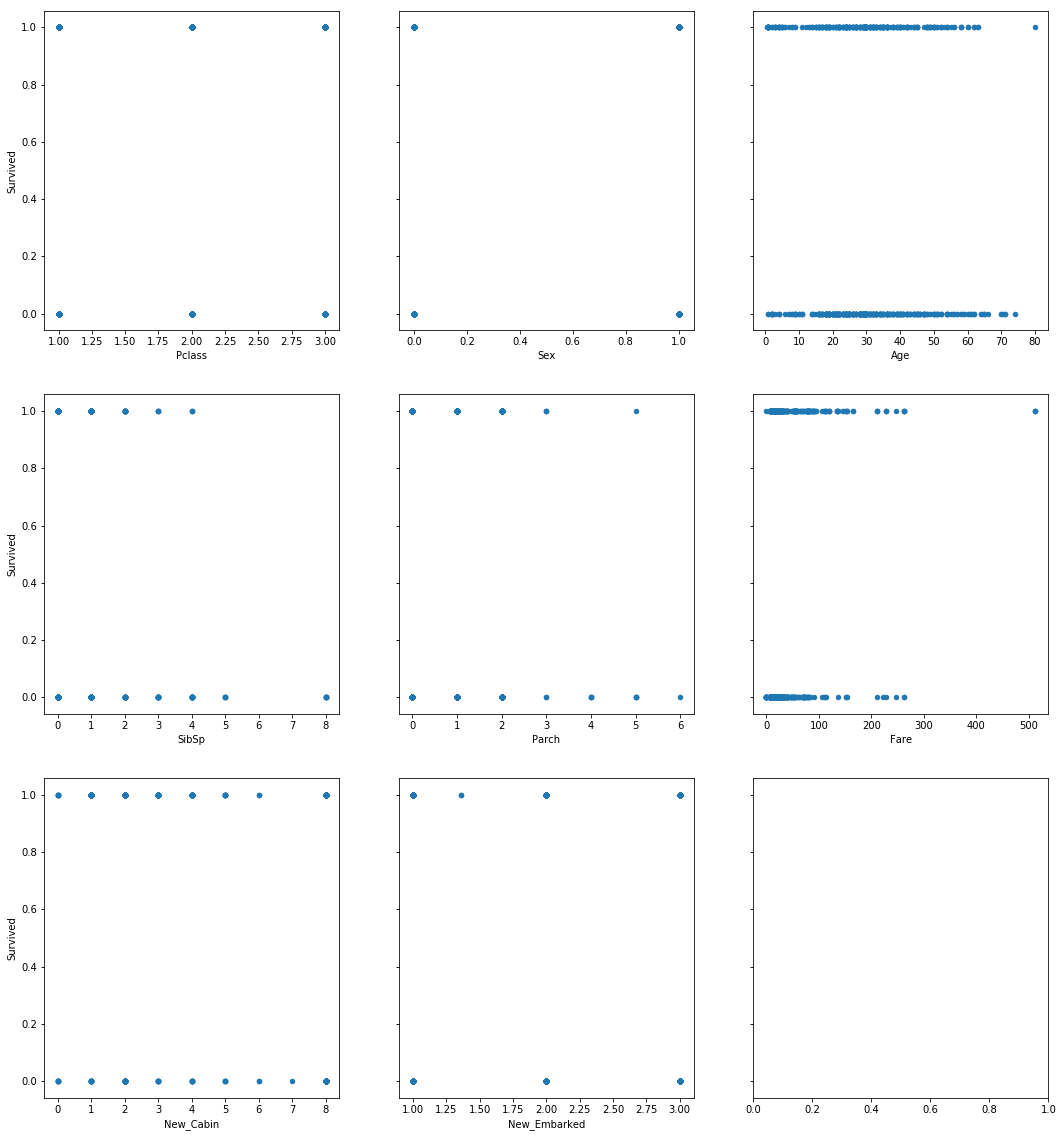

In [225]:
fig,axs=plt.subplots(3,3,sharey=True)
df3.plot(x='Pclass',y='Survived',kind='scatter',ax=axs[0,0],figsize=(18,20))
df3.plot(x='Sex',y='Survived',kind='scatter',ax=axs[0,1])
df3.plot(x='Age',y='Survived',kind='scatter',ax=axs[0,2])
df3.plot(x='SibSp',y='Survived',kind='scatter',ax=axs[1,0])
df3.plot(x='Parch',y='Survived',kind='scatter',ax=axs[1,1])
df3.plot(x='Fare',y='Survived',kind='scatter',ax=axs[1,2])
df3.plot(x='New_Cabin',y='Survived',kind='scatter',ax=axs[2,0])
df3.plot(x='New_Embarked',y='Survived',kind='scatter',ax=axs[2,1])


From above sorrelation and plot we found that there is no such feature which is not entirely non related so we will use all features

In [226]:
svcat={1:'Survived',0:'Not_Survived'}

In [227]:
df3['New_Survived']=df3['Survived'].map(svcat)

In [228]:
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Cabin,New_Embarked,New_Survived
0,0,3,1,22.0,1,0,7.2500,S,8,1.0,Not_Survived
1,1,1,0,38.0,1,0,71.2833,C,2,2.0,Survived
2,1,3,0,26.0,0,0,7.9250,S,8,1.0,Survived
3,1,1,0,35.0,1,0,53.1000,S,2,1.0,Survived
4,0,3,1,35.0,0,0,8.0500,S,8,1.0,Not_Survived


In [229]:
df3.shape

(891, 11)

In [230]:
featcol=['Pclass','Sex','Age','SibSp','Parch','Fare','New_Cabin','New_Embarked']
label=['New_Survived']

In [231]:
X=df3[featcol]
y=df3[label]

# Split data in train and test and perform Regression

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\abhinav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abhinav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [233]:
pred=model1.predict(X_test)


In [234]:
probs=model1.predict_proba(X_test)
#probs

# Finding Accuracy of the model

In [235]:
from sklearn import metrics
from sklearn.model_selection  import cross_val_score

In [236]:
scr=metrics.accuracy_score(y_test,pred)
scrauc=metrics.roc_auc_score(y_test,probs[:,1])

In [237]:
print('The Accuracy is= ',scr)
print('The AUC score is= ',scrauc)

The Accuracy is=  0.8059701492537313
The AUC score is=  0.8508333333333332


In [238]:
cm=metrics.confusion_matrix(y_test,pred)
cm

array([[144,  24],
       [ 28,  72]], dtype=int64)

In [239]:
clsrep=metrics.classification_report(y_test,pred)
print(clsrep)

              precision    recall  f1-score   support

Not_Survived       0.84      0.86      0.85       168
    Survived       0.75      0.72      0.73       100

   micro avg       0.81      0.81      0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.81      0.81       268

